In [1]:
#################################################################################
# This tuitoral performs basic data processing and data analysis for dataset using seurat
# refer to https://satijalab.org/seurat/ Vignette "Guided tutorial"
# Please modify this script to apply for specific dataset.
# Usage: Rscript HCA-d_data_processing_seurat.r datasetName dataFormat
# Usage example: Rscript HCA-d_data_processing_seurat.r spleen_spleen_Madissoon2019 10X
#################################################################################

In [1]:
datasetName = 'Spleen_Spleen_HCLAdult-Spleen1'
#datasetName value: organ_tissue_authorYear without space
dataFormat = 'tsv'
#dataFormat value: tsv (tab separated), 10X (sparse)
setwd("/data1/ljq/jupyter_code/bhyhcad/bhyhcad/hcl_all/Spleen_Spleen_HCLAdult-Spleen1")
library(Seurat)
library(data.table)
library(ggplot2)
#library(flexclust)
#install.packages('flexclust')

In [2]:
# Load the organized dataset
if(dataFormat == 'tsv'){
    data.matrix <- read.table(paste0(datasetName,"_expression.tsv.gz"), h = T, row.names = 1)
} else{
   system(paste0("tar -zxvf ", datasetName, "_expression.tar.gz")) #Invoke the unix command
   data.matrix <- Read10X(data.dir = paste0(datasetName,"_expression"))
   # data.dir: Directory containing the matrix.mtx, genes.tsv (or features.tsv), and barcodes.tsv files provided by 10X.
}
# Load the metadata and annotation
data.metadata <- read.table(file = paste0(datasetName,"_metadata.tsv"), h = T, sep = "\t", row.names = 5)
data.annotation <- read.table(file = paste0(datasetName,"_annotation.tsv"), h = T, sep = "\t", row.names = 1)
if (file.exists(paste0(datasetName,"_annotation2.tsv"))) {
    data.annotation2 <- read.table(file = paste0(datasetName,"_annotation2.tsv"), h = T, sep = "\t", row.names = 1)
}

In [3]:
dataobj <- CreateSeuratObject(counts = data.matrix, project = datasetName)
dataobj <- AddMetaData(dataobj, metadata = data.annotation)
dataobj[["percent.mt"]] <- PercentageFeatureSet(dataobj, pattern = "^[Mm][Tt]")

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


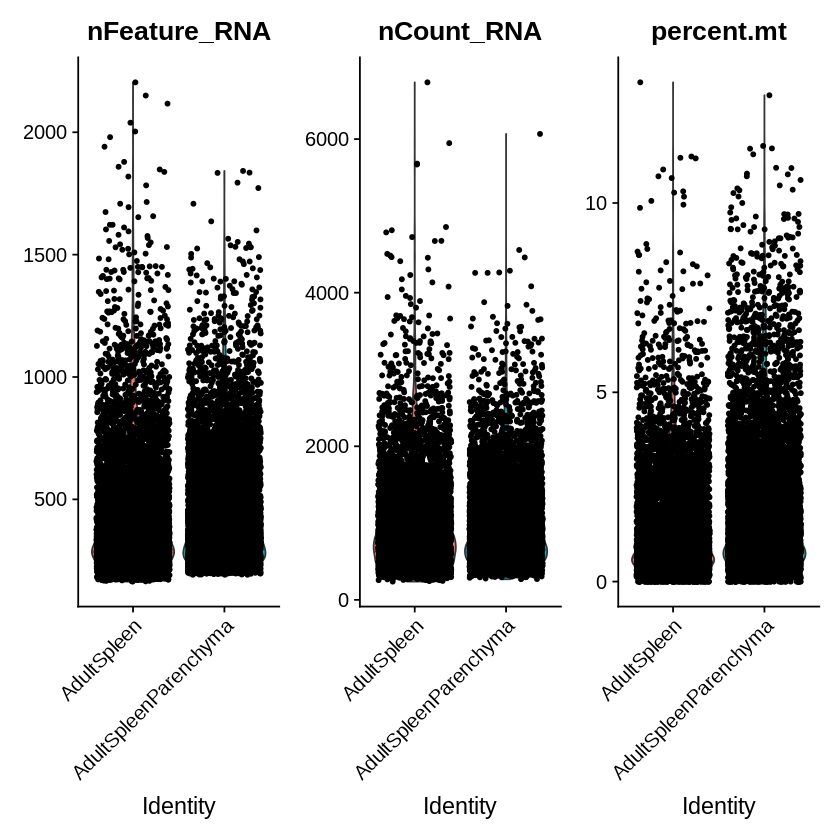

In [4]:
# Visualize QC metrics as a violin plot
VlnPlot(dataobj, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3)#+scale_color_npg() 不起作用

## 下面要调

In [5]:
# Pre-processing
min.cells = 3
min.features = 0
nFeature_RNA_range = c(20, 3000)
percent.mt.thre = 20

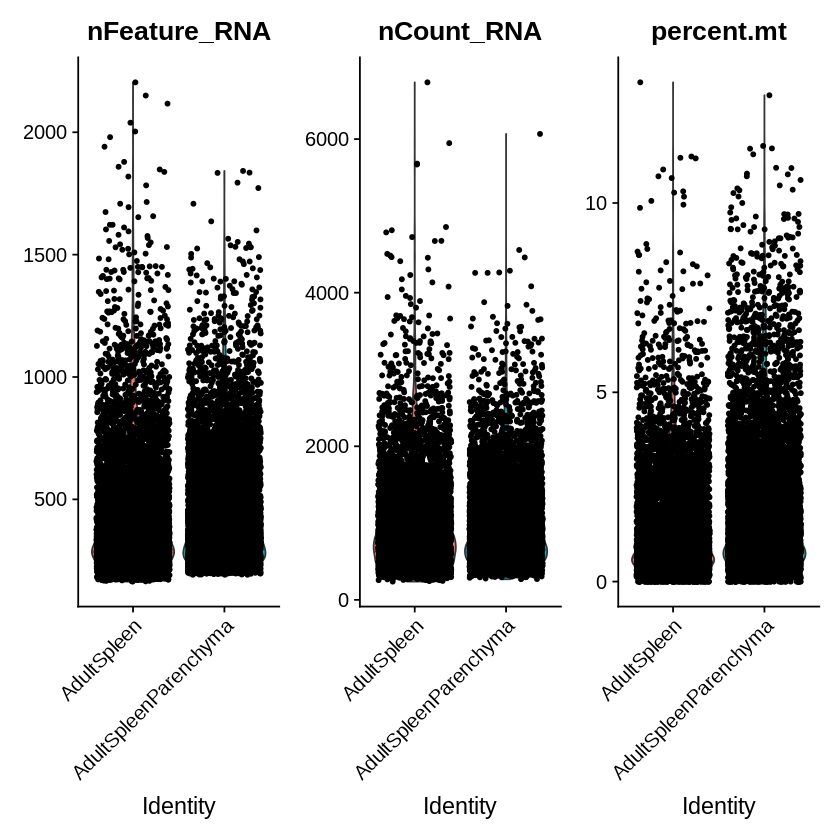

In [6]:
# QC
#dataobj[["percent.mt"]] <- PercentageFeatureSet(dataobj, pattern = "^[Mm][Tt]")
dataobj <- subset(dataobj, subset = nFeature_RNA > nFeature_RNA_range[1] & nFeature_RNA < nFeature_RNA_range[2] & percent.mt < percent.mt.thre)
# Visualize QC metrics as a violin plot
VlnPlot(dataobj, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3)#+scale_color_npg() 不起作用

In [7]:
# Normalization
# Two approaches
# 1. run standard log normalization 
dataobj <- NormalizeData(dataobj, normalization.method = "LogNormalize", scale.factor = 10000)
dataobj <- FindVariableFeatures(dataobj) # default feature number, nfeatures = 2000
dataobj <- ScaleData(dataobj, features = VariableFeatures(dataobj))

Centering and scaling data matrix



In [8]:
# Dimensional Reduction
dataobj <- RunPCA(dataobj, features = VariableFeatures(object = dataobj))
# Determine the ‘dimensionality’ of the dataset according to elbow plot
pdf(paste0(datasetName,"seurat.elbowplot.pdf"))
ElbowPlot(dataobj) 
dev.off()


PC_ 1 
Positive:  C1QC, SLC40A1, C1QA, CD163, CD5L, GLUL, MS4A7, MARCO, FCGR3A, C1QB 
	   AIF1, CTSL, CPVL, SEPP1, FCER1G, TMSB4X, MS4A6A, TYROBP, LIPA, CSF1R 
	   CST3, CXCL12, LST1, MPEG1, VCAM1, CTSB, S100A11, HMOX1, ACTB, IGSF6 
Negative:  HSPA5, IGLV3-1, IGLC3, CCND2, IGHA1, IGKV4-1, IGHG3, RPL18A, IGHV6-1, IGKV3-20 
	   IGLV6-57, RPL10, RPS18, IGHV3-23, RPL35A, RPS6, RAB30, DPEP1, IL5RA, IGKV3-15 
	   IGLL5, RPL23A, IGKJ1, DNAAF1, RPL36A, RPL7, RPL6, FAM30A, IGHM, HIST1H4C 
PC_ 2 
Positive:  PCDH17, IFI27, TM4SF1, SERPINA5, SERPINA3, KLF4, NTN4, LYVE1, PLVAP, HES1 
	   TGFBR3, ACKR1, LIMCH1, RNASE1, ACKR3, CD36, INSR, ADGRL4, TIMP3, IGFBP4 
	   HYAL2, FOSB, SEPW1, CXCL2, ITGA1, PCAT19, DHCR24, MRC1, TGFBR2, SDPR 
Negative:  S100A8, S100A9, S100A12, MMP8, RGL4, CD177, ALOX5AP, ANXA3, LCN2, S100P 
	   MNDA, HP, ANXA1, RETN, GCA, MCEMP1, ARG1, FCN1, PLAC8, LYZ 
	   S100A6, FCER1G, CYSTM1, CST7, FPR1, SERPINA1, IL1R2, NKG7, ZDHHC19, TCN1 
PC_ 3 
Positive:  S100A8, S100A9, S100A12, IF

png 
  2

Warning message in ElbowPlot(dataobj, 100):
“The object only has information for 50 reductions”


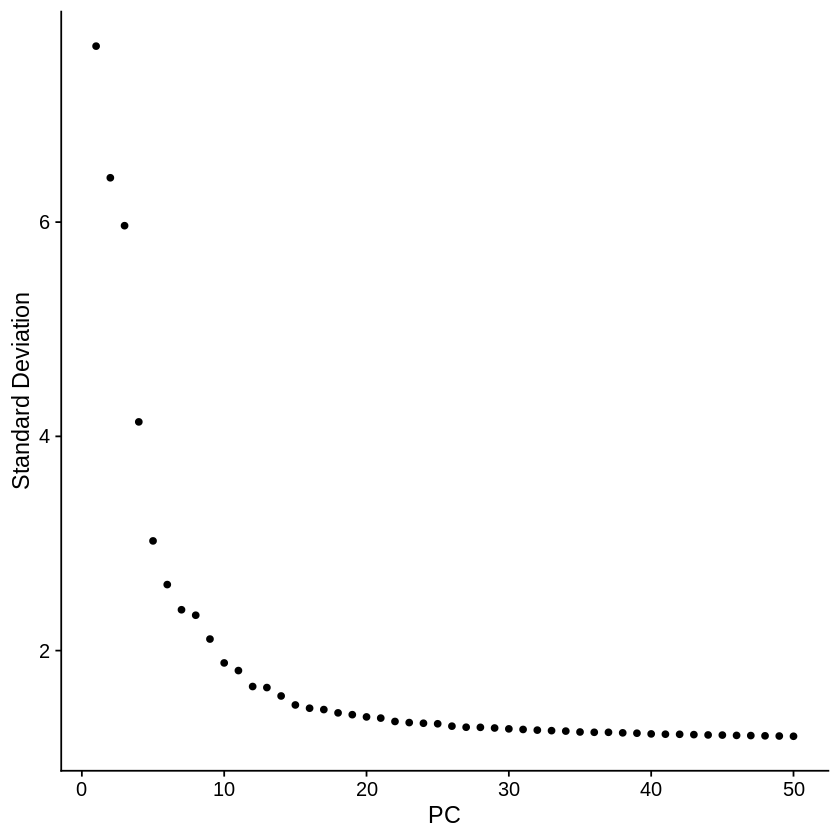

In [9]:
ElbowPlot(dataobj,100) 

## 下面要调

In [10]:
pcDim = 20
# Cluster the cells
dataobj <- FindNeighbors(dataobj, reduction = "pca", dims = 1:pcDim, nn.eps = 0.5)
dataobj <- FindClusters(dataobj, resolution = 0.5, n.start = 10)

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 15806
Number of edges: 549880

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8540
Number of communities: 14
Elapsed time: 2 seconds


In [19]:
dataobj <- FindClusters(dataobj, resolution = 0.3, n.start = 10)

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 15806
Number of edges: 549880

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9116
Number of communities: 9
Elapsed time: 2 seconds


In [11]:
# Visulize the clustering result
dataobj <- RunUMAP(dataobj, dims = 1:pcDim)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
04:53:23 UMAP embedding parameters a = 0.9922 b = 1.112

04:53:23 Read 15806 rows and found 20 numeric columns

04:53:23 Using Annoy for neighbor search, n_neighbors = 30

04:53:23 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*

|

04:53:26 Writing NN index file to temp file /tmp/RtmpNzbU5k/file262e479257cb

04:53:26 Searching Annoy index using 1 thread, search_k = 3000

04:53:31 Annoy recall = 100%

04:53:31 Commencing smooth kNN distance calibration using 1 thread

04:53:32 Initializing f

In [20]:
p_umap <- DimPlot(dataobj, reduction = "umap", label = TRUE, pt.size=1)
ggsave(paste0(datasetName,".seurat.umap_hcad.tiff"), plot = p_umap, width = 8, height = 5)

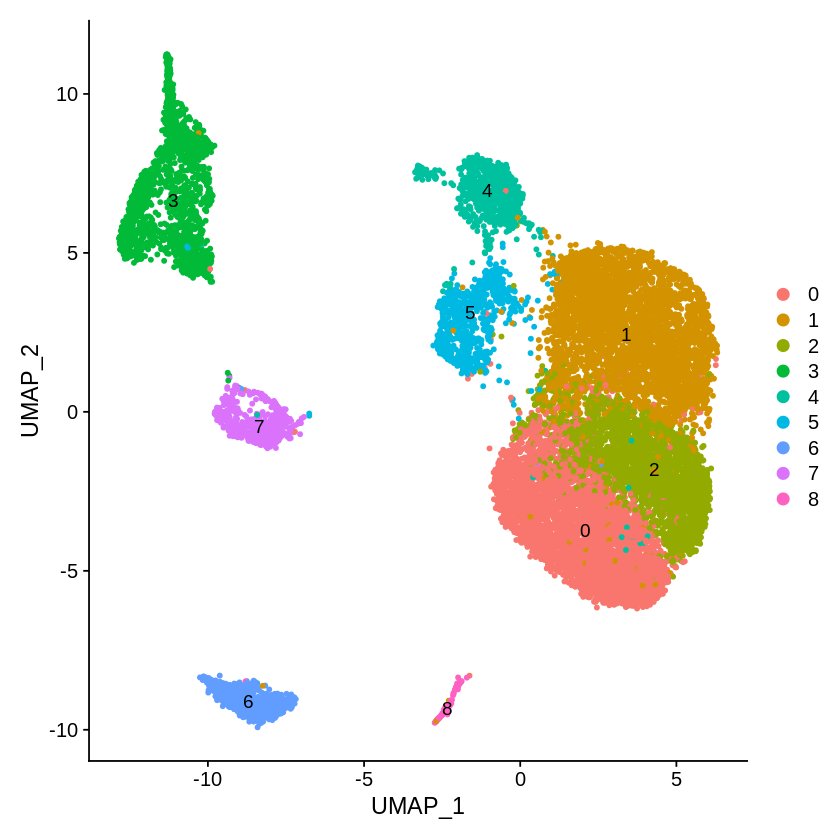

In [21]:
p_umap

In [16]:
new.cluster.ids<-c('Blood-Connective tissue-T cell-HSPE1','Unknown','Unknown','Blood-Connective tissue-T cell-CD3D','Blood-Connective tissue-Erythrocyte-AHSP','Blood-Connective tissue-Activated T cell-XCL1 XCL2','Blood-Connective tissue-Conventional dendritic cell-CD74 HLA-DRA')

In [17]:
names(new.cluster.ids) <- levels(dataobj)
dataobj <- RenameIdents(dataobj, new.cluster.ids)
hcad.label = Idents(dataobj)
dataobj <- AddMetaData(dataobj, metadata = hcad.label,col.name = 'hcad.label')

In [18]:
saveRDS(dataobj, file = paste0(datasetName,".seuratobj22.rds"))

In [35]:
target_rds = paste0('/stor/public/hcad/',datasetName,'/',datasetName,'.seuratobj.dbupload_v1.rds')

In [ ]:
saveRDS(dataobj, file = target_rds)

In [22]:
p_umap2 <- DimPlot(dataobj, reduction = "umap", label = TRUE, group.by = "cell_cluster", pt.size=1)
ggsave(paste0(datasetName,".seurat.umap_orig.tiff"), plot = p_umap2, width = 8, height =5)

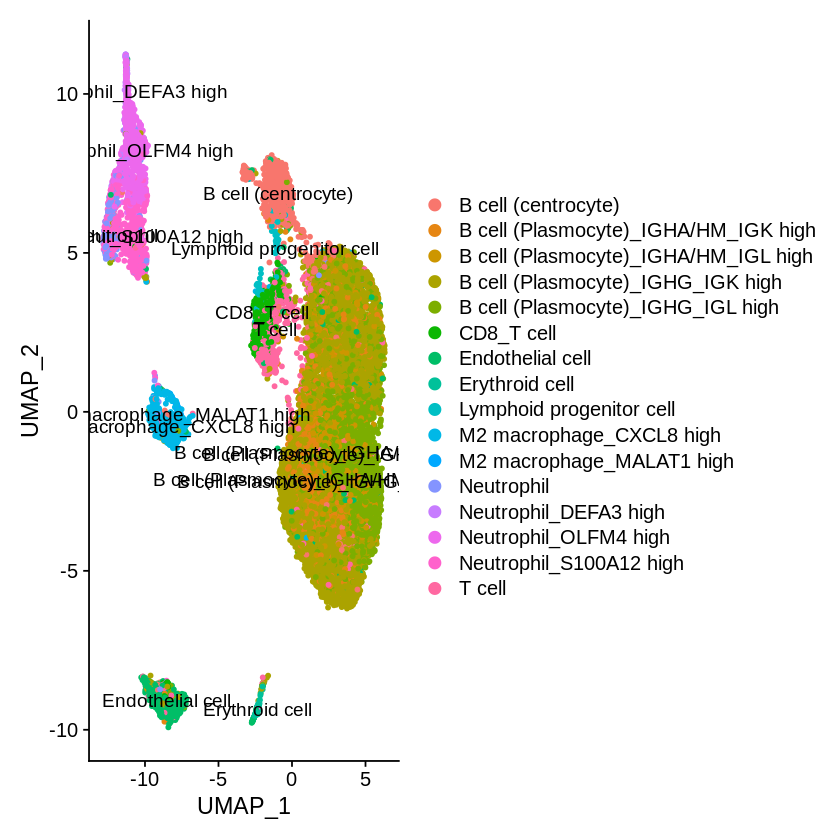

In [23]:
p_umap2

In [16]:

# Finding cluster markers 
dataobj.markers <- FindAllMarkers(dataobj, only.pos = TRUE, min.pct = 0.25, logfc.threshold = 0.25)
write.table(dataobj.markers, file = paste0(datasetName,".seurat.markers.txt"), sep = "\t", quote = F, row.names = F, col.names = T)

saveRDS(dataobj, file = paste0(datasetName,".seuratobj.rds"))

Calculating cluster 0

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4

Calculating cluster 5

Calculating cluster 6

Calculating cluster 7

Calculating cluster 8

Calculating cluster 9

